# The Sparks Foundation Internship

## Data Science & Business Analytics PATH
## Author: Ayoub Berdeddouch

### Task 5: Exploratory Data Analysis - Sport (Level - Advanced)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

import plotly.graph_objects as go
import plotly.express as px
import plotly.tools as tls

import folium
import folium.plugins

#import altair as alt   # Library for VIZ

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data 
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')
print("Data imported successfully")

print(f'Number of rows Deliveries    = {len(deliveries)}')
print(f'Number of columns = {len(deliveries.columns)}')
print("------------------------------------")
print(f'Number of rows Matches    = {len(matches)}')
print(f'Number of columns = {len(matches.columns)}')

Data imported successfully
Number of rows Deliveries    = 179078
Number of columns = 21
------------------------------------
Number of rows Matches    = 756
Number of columns = 18


In [3]:
deliveries.head(3)

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  

[3 rows x 21 columns]

In [23]:
matches.head(3)

id  season       city        date                team1  \
0   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06       Mumbai Indians   
2   3    2017     Rajkot  2017-04-07        Gujarat Lions   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   

   result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0  normal           0     Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiant            0               7   
2  normal           0   Kolkata Knight Riders            0              10   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   
2         CA Lynn     Saurashtra Cricket Association Stadium     Nitin Menon   

     umpire2 umpire3  year  TossWinGameWin  
0   NJ Llong     NaN  2017           False  
1     S Ravi     NaN  2017            True  
2  CK Nandan     NaN  2017            True

## Checking Null?

In [5]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [6]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## Intel on both Datasets ( Matches & Deliveries)

In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Matches won at each location by different teams every year


In [10]:

matches['year'] = pd.to_datetime(matches['date']).dt.year
match1 = matches.groupby(['year','city','winner']).count()
match2 = match1.reset_index()[['year','city','winner','id']].sort_values(by = 'year', ascending = True)
match3 = match2.drop_duplicates(subset=['city'])

fig = px.scatter(match2, x='city', y="id",color='winner', animation_frame="year", width=1200, height=400)
fig.update_xaxes(categoryorder='array', categoryarray= match3['city']) 
fig.show()

### Man of Matches won at each location by different teams every year

    What will become clear in the below diagrams is that no one person has mare than 2-3 man of the mataches any year. So clearly it is the team that helps win IPL and not individuals

In [11]:
IPL_match1 = matches.groupby(['year','city','player_of_match']).count()
IPL_match2 = IPL_match1.reset_index()[['year','city','player_of_match','id']].sort_values(by = 'year', ascending = True)
IPL_match3 = IPL_match2.drop_duplicates(subset=['city'])

fig = px.scatter(IPL_match2, x='city', y="id",color='player_of_match', animation_frame="year", width=1000, height=600)
fig.update_xaxes(categoryorder='array', categoryarray= IPL_match3['city'])    
fig.show()

In [12]:
fig = px.scatter(IPL_match2, x='player_of_match', y="id",color='city', animation_frame="year", width=1000, height=400)
fig.update_xaxes(categoryorder='array', categoryarray= IPL_match3['player_of_match'])     
fig.show()

### Impact of Toss on the outcome

In [13]:
def WinCheck(row):
    if row['toss_winner'] == row['winner']:
        return True
    else:
        return False

matches['TossWinGameWin'] = matches.apply(lambda row:WinCheck(row), axis = 1)

IPL_match1 = matches.groupby(['year','toss_winner','TossWinGameWin']).count()
IPL_match2 = IPL_match1.reset_index()[['year','toss_winner','TossWinGameWin','id']].sort_values(by = 'year', ascending = True)
IPL_match3 = IPL_match2.drop_duplicates(subset=['toss_winner'])
IPL_match2 = IPL_match2.rename(columns={"id": "count"})

In [14]:
IPL_match2.head()

year                  toss_winner  TossWinGameWin  count
0   2008          Chennai Super Kings           False      2
15  2008  Royal Challengers Bangalore            True      1
14  2008  Royal Challengers Bangalore           False      4
13  2008             Rajasthan Royals            True      9
12  2008             Rajasthan Royals           False      2

In [15]:
fig = px.scatter(IPL_match2, x='toss_winner', y="TossWinGameWin", color = 'count', size = 'count', animation_frame="year", width=1000, height=400)
fig.update_xaxes(categoryorder='array', categoryarray= IPL_match3['toss_winner'])
fig.show()

### In many Stadiums, teams who win the toss always field

In [16]:
IPL_match1 = matches.groupby(['year','city','toss_decision']).count()
IPL_match2 = IPL_match1.reset_index()[['year','city','toss_decision','id']].sort_values(by = 'year', ascending = True)
IPL_match3 = IPL_match2.drop_duplicates(subset=['city'])
IPL_match2 = IPL_match2.rename(columns={"id": "count"})

fig = px.scatter(IPL_match2, x='city', y="count",color='toss_decision', animation_frame="year", width=1000, height=400)
fig.update_xaxes(categoryorder='array', categoryarray= IPL_match3['city'])     
fig.show()

    * If you win the toss you should field. Also if you field first then chances of winning is more but by a narrow margin.
    
    * In 2019 at Jaipur, Chennai, Mumbai and Kolkata, team who won the toss always fielded

### Most Man of Match

In [17]:

#data['year'] = [x[:4] for x in data['date']]
years = matches.year.unique()
print(years)
man_of_match = pd.DataFrame([],columns=['Year','Man of Match','Times'])
for id, year in enumerate(years):
    player_of_match = matches['player_of_match'][matches['year']==year]
    man_of_match.loc[id] = [year, player_of_match.value_counts().index[0], player_of_match.value_counts()[0]]
man_of_match
  

[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]


Year     Man of Match Times
0   2017  NM Coulter-Nile     3
1   2008         SE Marsh     5
2   2009        YK Pathan     3
3   2010     SR Tendulkar     4
4   2011         CH Gayle     6
5   2012         CH Gayle     5
6   2013       MEK Hussey     5
7   2014       GJ Maxwell     4
8   2015        DA Warner     4
9   2016          V Kohli     5
10  2018      Rashid Khan     4
11  2019       AD Russell     4

Text(0.5, 1.0, 'Most Man of Match Year-Wise (2008-2020)')

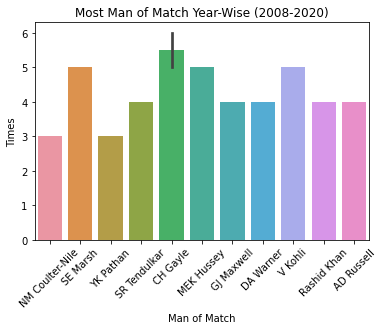

In [19]:
sns.barplot(x='Man of Match',y = 'Times', data= man_of_match)
plt.xticks(rotation=45)
plt.title('Most Man of Match Year-Wise (2008-2020)')

## Best Batsmen from each teams

In [20]:
IPL_ball_bat2 = deliveries[['batting_team','batsman','batsman_runs']].groupby(['batting_team','batsman']).sum()
IPL_ball_bat2 = IPL_ball_bat2.reset_index().sort_values(by = 'batsman_runs', ascending = False)


IPL_ball_bat3 = deliveries[['batting_team','batsman','match_id']].groupby(['batting_team','batsman','match_id']).count()
IPL_ball_bat3 = IPL_ball_bat3.reset_index().groupby(['batting_team','batsman']).count()
IPL_ball_bat3 = IPL_ball_bat3.reset_index().sort_values(by = 'match_id', ascending = False)


IPL_bat_lst = IPL_ball_bat2.merge(IPL_ball_bat3,left_on=['batting_team','batsman'], right_on=['batting_team','batsman'])

IPL_bat_lst = IPL_bat_lst.rename(columns={"match_id": "Matches"})

IPL_bat_lst


batting_team         batsman  batsman_runs  Matches
0    Royal Challengers Bangalore         V Kohli          5434      169
1            Chennai Super Kings        SK Raina          4574      160
2            Chennai Super Kings        MS Dhoni          3903      143
3    Royal Challengers Bangalore  AB de Villiers          3757      116
4                 Mumbai Indians       RG Sharma          3744      138
..                           ...             ...           ...      ...
930        Kolkata Knight Riders         J Denly             0        1
931          Sunrisers Hyderabad         K Ahmed             0        1
932      Rising Pune Supergiants        M Ashwin             0        1
933             Rajasthan Royals        JDP Oram             0        1
934             Delhi Daredevils     Sunny Gupta             0        1

[935 rows x 4 columns]

In [21]:
IPL_bat_lst['Average'] = IPL_bat_lst['batsman_runs']/IPL_bat_lst['Matches']
IPL_bat_lst = IPL_bat_lst.sort_values(by = 'Average', ascending = False)

fig = px.scatter(IPL_bat_lst, x='Average', y="Matches",size='batsman_runs', color="batsman", width=1000, height=400)
#fig.update_xaxes(categoryorder='array', categoryarray= IPL_ball_bat1['batsman'])     
fig.show()

   From the graph it is clear that batsman who have played __more than 50 matches__ and have an __average over 27__ are the __consistent performers__ and an asset to the team

In [22]:
IPL_best_bat_lst = IPL_bat_lst[(IPL_bat_lst['Average'] > 27) & (IPL_bat_lst['Matches'] > 50)]
IPL_best_bat_lst['batsman'][0:15]

5          DA Warner
6           CH Gayle
11          SE Marsh
3     AB de Villiers
0            V Kohli
14         SR Watson
8          AM Rahane
10          S Dhawan
15      SR Tendulkar
12        RV Uthappa
21      F du Plessis
1           SK Raina
7          G Gambhir
16          V Sehwag
2           MS Dhoni
Name: batsman, dtype: object

## Highest scorers in IPL from each teams

In [29]:
IPL_ball_bat = deliveries[['batting_team','batsman','batsman_runs']].groupby(['batting_team','batsman']).sum()
IPL_ball_bat = IPL_ball_bat.reset_index().sort_values(by = 'batsman_runs', ascending = False)
IPL_ball_bat.head()

batting_team         batsman  batsman_runs
866  Royal Challengers Bangalore         V Kohli          5434
50           Chennai Super Kings        SK Raina          4574
36           Chennai Super Kings        MS Dhoni          3903
764  Royal Challengers Bangalore  AB de Villiers          3757
553               Mumbai Indians       RG Sharma          3744

In [27]:
IPL_ball_bat1 = IPL_ball_bat[0:30]

fig = px.scatter(IPL_ball_bat1, x='batsman', y="batsman_runs",size='batsman_runs', color="batting_team", width=1000, height=400)

fig.show()

## Calculating Best Averages and Ability to Bat in multiple position (Open, Middle order and Slog overs)

### Openlist

In [44]:
IPL_ball1 = deliveries.sort_values(by='over')
IPL_ball2 = IPL_ball1[['batsman','batting_team','over','batsman_runs']]
IPL_openr_lst = IPL_ball1[IPL_ball2['over'] > 1]['batsman']
IPL_openr_lst = IPL_openr_lst.drop_duplicates().to_frame()
IPL_openr_lst = IPL_openr_lst.merge(IPL_ball_bat,left_on='batsman', right_on='batsman')
IPL_openr_lst = IPL_openr_lst.groupby('batsman').sum().sort_values(by = 'batsman_runs', ascending = False)
IPL_openr_lst = IPL_openr_lst.reset_index()


In [48]:
IPL_openr_lst[0:10]

batsman  batsman_runs
0         V Kohli          5434
1        SK Raina          5415
2       RG Sharma          4914
3       DA Warner          4741
4        S Dhawan          4632
5        CH Gayle          4560
6        MS Dhoni          4477
7      RV Uthappa          4446
8  AB de Villiers          4428
9       G Gambhir          4223

### Mid List

In [51]:
IPL_mid_lst = IPL_ball2[(IPL_ball2['over'] > 10) & (IPL_ball2['over'] < 15)]['batsman']
IPL_mid_lst = IPL_mid_lst.drop_duplicates().to_frame()
IPL_mid_lst = IPL_mid_lst.merge(IPL_ball_bat,left_on='batsman', right_on='batsman')
IPL_mid_lst = IPL_mid_lst.groupby('batsman').sum().sort_values(by = 'batsman_runs', ascending = False)
IPL_mid_lst = IPL_mid_lst.reset_index()
IPL_mid_lst[0:10]

batsman  batsman_runs
0         V Kohli          5434
1        SK Raina          5415
2       RG Sharma          4914
3       DA Warner          4741
4        S Dhawan          4632
5        CH Gayle          4560
6        MS Dhoni          4477
7      RV Uthappa          4446
8  AB de Villiers          4428
9       G Gambhir          4223

### Slog list

In [52]:
IPL_slog_lst = IPL_ball2[(IPL_ball2['over'] > 18)]['batsman']
IPL_slog_lst = IPL_slog_lst.drop_duplicates().to_frame()
IPL_slog_lst = IPL_slog_lst.merge(IPL_ball_bat,left_on='batsman', right_on='batsman')
IPL_slog_lst = IPL_slog_lst.groupby('batsman').sum().sort_values(by = 'batsman_runs', ascending = False)
IPL_slog_lst = IPL_slog_lst.reset_index()
IPL_slog_lst[0:10]

batsman  batsman_runs
0         V Kohli          5434
1        SK Raina          5415
2       RG Sharma          4914
3       DA Warner          4741
4        S Dhawan          4632
5        CH Gayle          4560
6        MS Dhoni          4477
7      RV Uthappa          4446
8  AB de Villiers          4428
9       G Gambhir          4223

In [53]:
index = 0

Openlist = []
Midlist = []
Sloglist = []

for index1, row1 in IPL_bat_lst.iterrows():
    loc1 = 0
    loc2 = 0
    loc3 = 0
    
    for index2, row2 in IPL_openr_lst.iterrows():
        if row1['batsman'] == row2['batsman']:
            Openlist.append(1)
            loc1=1
            
    for index3, row3 in IPL_mid_lst.iterrows():
        if row1['batsman'] == row3['batsman']:
            Midlist.append(1)
            loc2=1

    for index4, row4 in IPL_slog_lst.iterrows():
        if row1['batsman'] == row4['batsman']:
            Sloglist.append(1)
            loc3=1
            
    if loc1 == 0:
        Openlist.append(0)
        
    if loc2 == 0:
        Midlist.append(0)
        
    if loc3 == 0:
        Sloglist.append(0)          
        
IPL_bat_lst['Openlist'] = pd.Series(Openlist).values
IPL_bat_lst['Midlist'] = pd.Series(Midlist).values
IPL_bat_lst['Sloglist'] = pd.Series(Sloglist).values

In [55]:
# Best Batsman in IPL based on averages and ability to bat at multiple position

IPL_bat_lst[0:10]

batting_team      batsman  batsman_runs  Matches  \
142          Sunrisers Hyderabad   J Bairstow           468       10   
5            Sunrisers Hyderabad    DA Warner          3306       71   
29               Kings XI Punjab     KL Rahul          1288       28   
62              Rajasthan Royals   JC Buttler           903       21   
216      Rising Pune Supergiants    SPD Smith           270        7   
61               Kings XI Punjab     CH Gayle           909       24   
6    Royal Challengers Bangalore     CH Gayle          3175       84   
43                Mumbai Indians  LMP Simmons          1079       29   
267              Kings XI Punjab      SN Khan           184        5   
19           Chennai Super Kings   MEK Hussey          1768       49   

       Average  Openlist  Midlist  Sloglist  
142  46.800000         1        1         0  
5    46.563380         1        1         1  
29   46.000000         1        1         1  
62   43.000000         1        1         1  
216  38.571429         1        1         1  
61   37.875000         1        1         1  
6    37.797619         1        1         1  
43   37.206897         1        1         1  
267  36.800000         1        1         1  
19   36.081633         1        1         1

In [58]:
# Best Bowlers in IPL Team

IPL2 = deliveries[['bowling_team','bowler','dismissal_kind']].groupby(['bowling_team','bowler']).count()
IPL2 = IPL2.reset_index().sort_values(by = 'dismissal_kind', ascending = False)
IPL3 = IPL2[0:20]

fig = px.scatter(IPL3, x='bowler', y="dismissal_kind",size='dismissal_kind', color="bowling_team", width=1000, height=400)
#fig.update_xaxes(categoryorder='array', categoryarray= IPL_ball_bat1['batsman'])     
fig.show()

In [59]:
# Best position for each player
IPL_ball1 = deliveries.sort_values(by=['match_id','batting_team','over'], ascending= True)
IPL_ball2 = IPL_ball1[['batsman','batting_team','match_id','batsman_runs']].groupby(['match_id','batting_team','batsman']).sum()
IPL_ball2 = IPL_ball2.reset_index()

In [60]:
Team = " "
IPL_pos_list = []

for index1, row1 in IPL_ball2.iterrows():    
    if row1['batting_team'] != Team:
        position = 0
        Team = row1['batting_team']
    else:
        position = position + 1 

    IPL_pos_list.append(position)
   
    
IPL_ball2['Position'] = pd.Series(IPL_pos_list).values
IPL_ball_grp_runs = IPL_ball2.groupby(['batting_team','batsman','Position']).sum()
IPL_ball_grp_count = IPL_ball2.groupby(['batting_team','batsman','Position']).count()
IPL_ball_grp_runs = IPL_ball_grp_runs.reset_index()
IPL_ball_grp_count = IPL_ball_grp_count.reset_index()

In [61]:
IPL_position = IPL_ball_grp_runs[['batting_team','batsman','Position','batsman_runs']]
IPL_position['matches'] = IPL_ball_grp_count['batsman_runs']

IPL_position['averages'] = IPL_position['batsman_runs']/IPL_position['matches']

In [63]:
fig = px.scatter(IPL_position, x='batsman', y="Position", color = 'batsman_runs', size = 'averages', animation_frame="batting_team", width=1000, height=400)
fig.show()

In [64]:
batsman1 = IPL_position[IPL_position['batting_team'] == 'Mumbai Indians'].groupby('batsman').sum()
IPL_position1 = IPL_position[['batting_team','batsman','Position','averages']]
IPL_position1 = IPL_position1.groupby(['batting_team','batsman','Position'])['averages'].agg({'max'})
IPL_position1

max
batting_team        batsman      Position           
Chennai Super Kings A Flintoff   0         20.666667
                    A Mukund     0          0.000000
                    A Nehra      0          0.250000
                    AS Rajpoot   0          2.000000
                    AT Rayudu    0         27.575758
...                                              ...
Sunrisers Hyderabad Yuvraj Singh 5         32.500000
                                 6          5.000000
                                 7         10.600000
                                 8         27.500000
                                 9         24.666667

[3004 rows x 1 columns]

## Team 1 VS Team 2

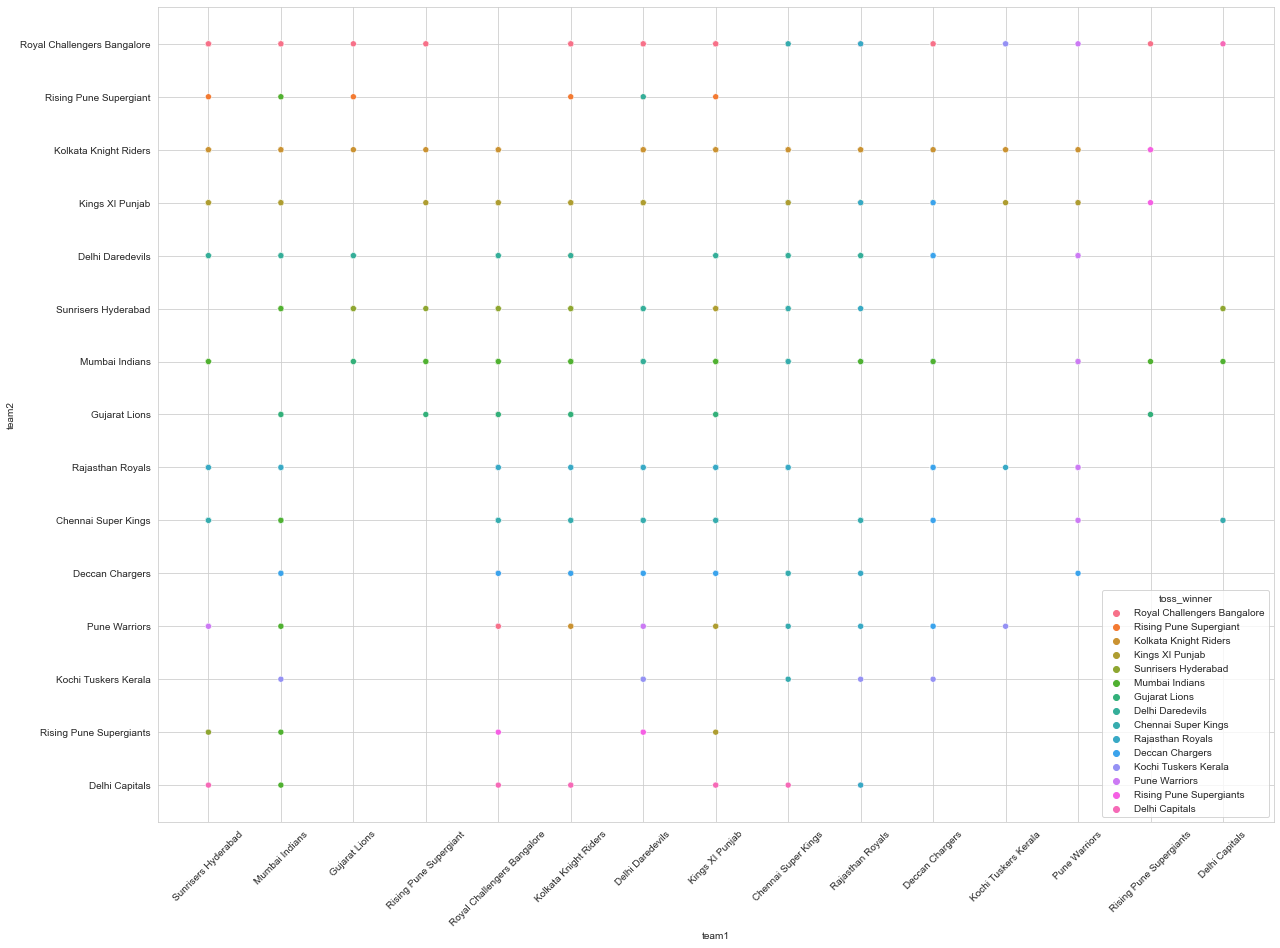

In [72]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=matches.team1,y=matches.team2,hue=matches.toss_winner)
plt.xticks(rotation=45)
plt.show()

    Here we can compare that when team1 and team2 are face to face, then who is the toss winner more frequently.

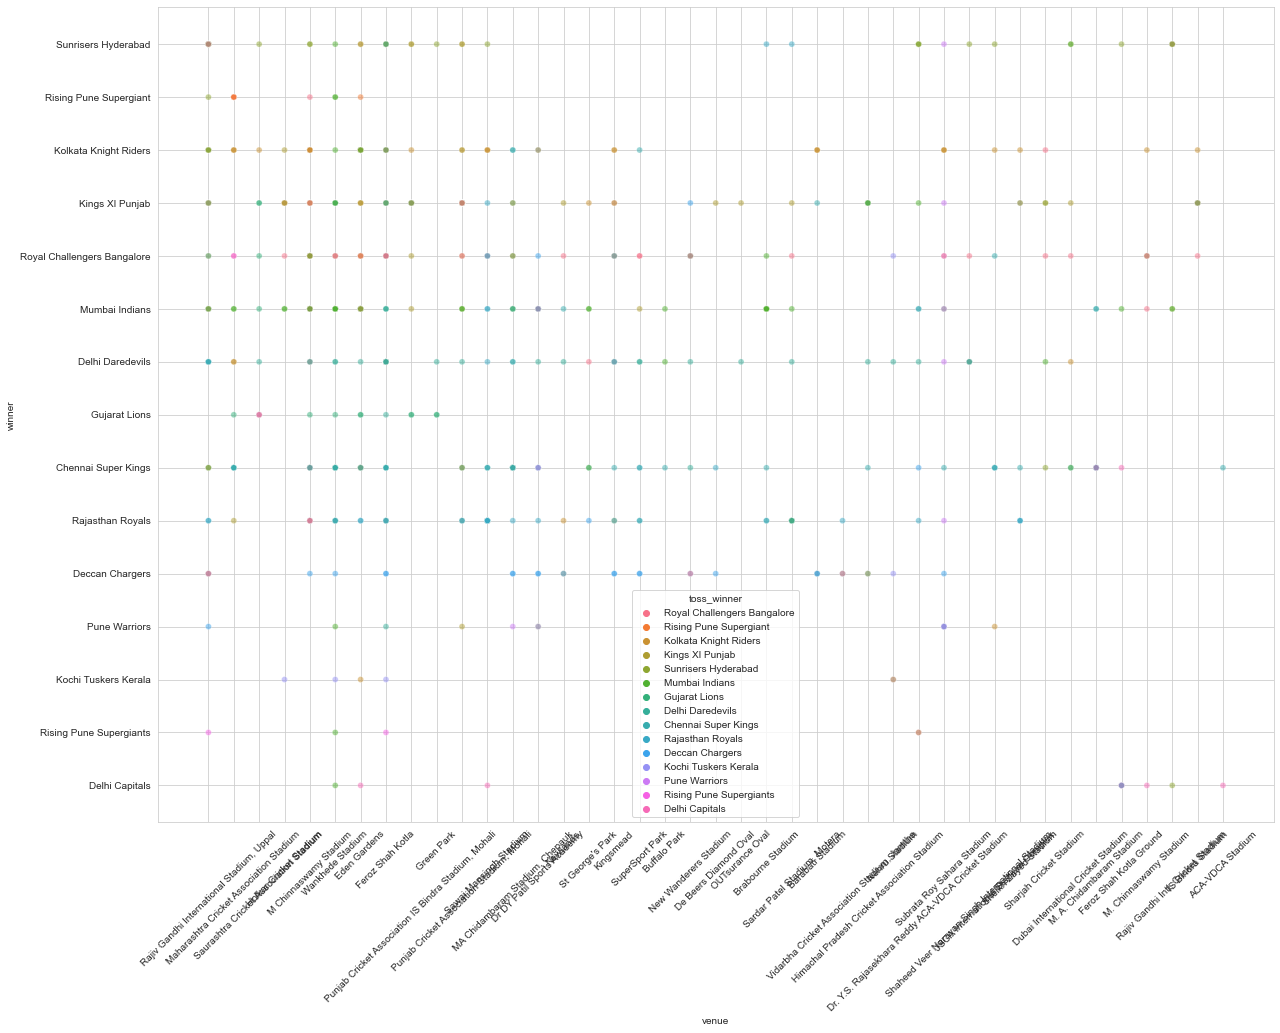

In [73]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=matches.venue,y=matches.winner,hue=matches.toss_winner,alpha=0.5)
plt.xticks(rotation=45)
plt.show()

    Here we can see that there is a high probability for a team to win a toss on its home ground and also win the game.

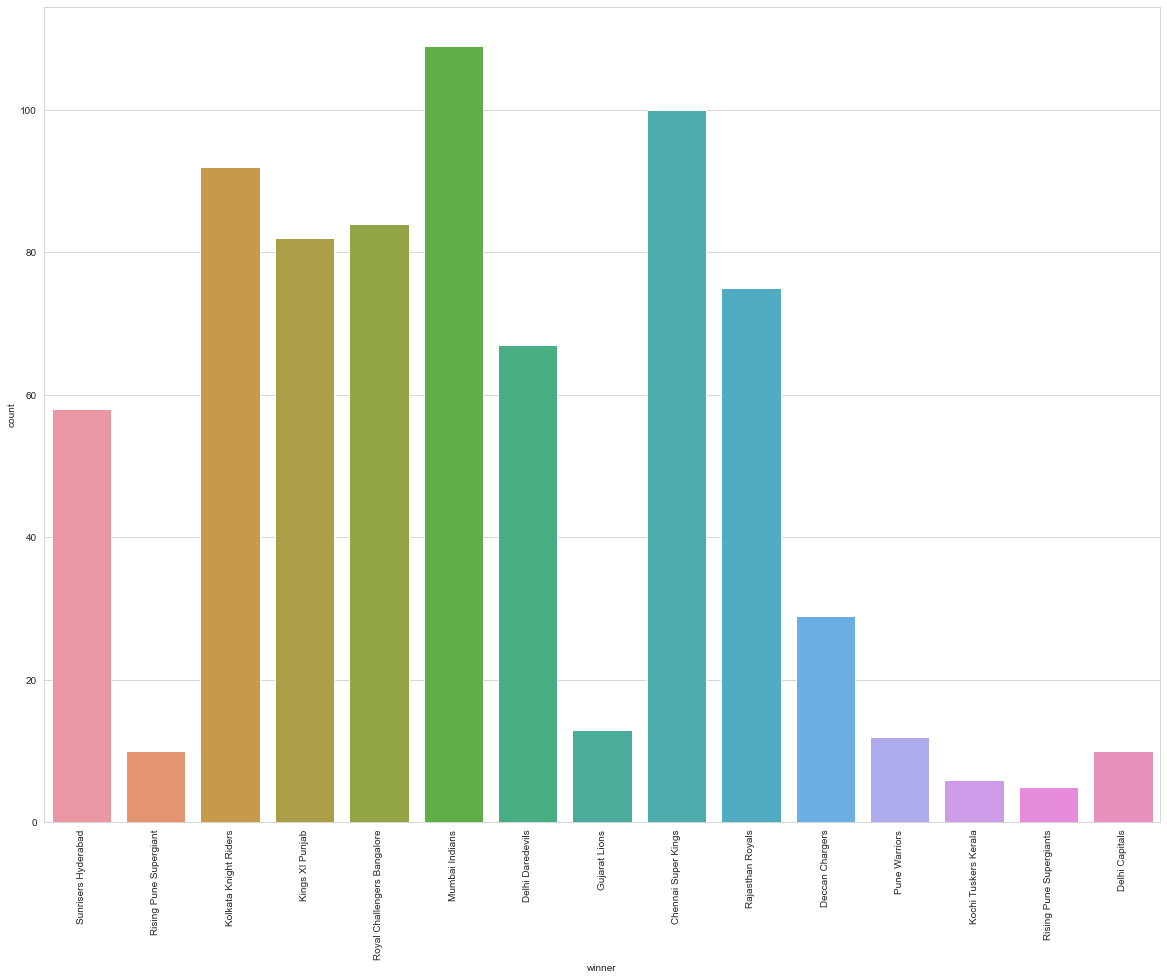

In [78]:
plt.figure(figsize=(20,15))
sns.set_style('whitegrid')
sns.countplot(x=matches.winner)
plt.xticks(rotation=90)
plt.show()

    We can clearly see that Mumbai Indians have won a large number of matches. Teams like Deccan Chargers, Pune Warriors, Kochi Tuskers Kerala, Rising Pune Supergaints and Delhi Capitals have relatively less wins because they are new teams or older teams which have played very less seasons of IPL

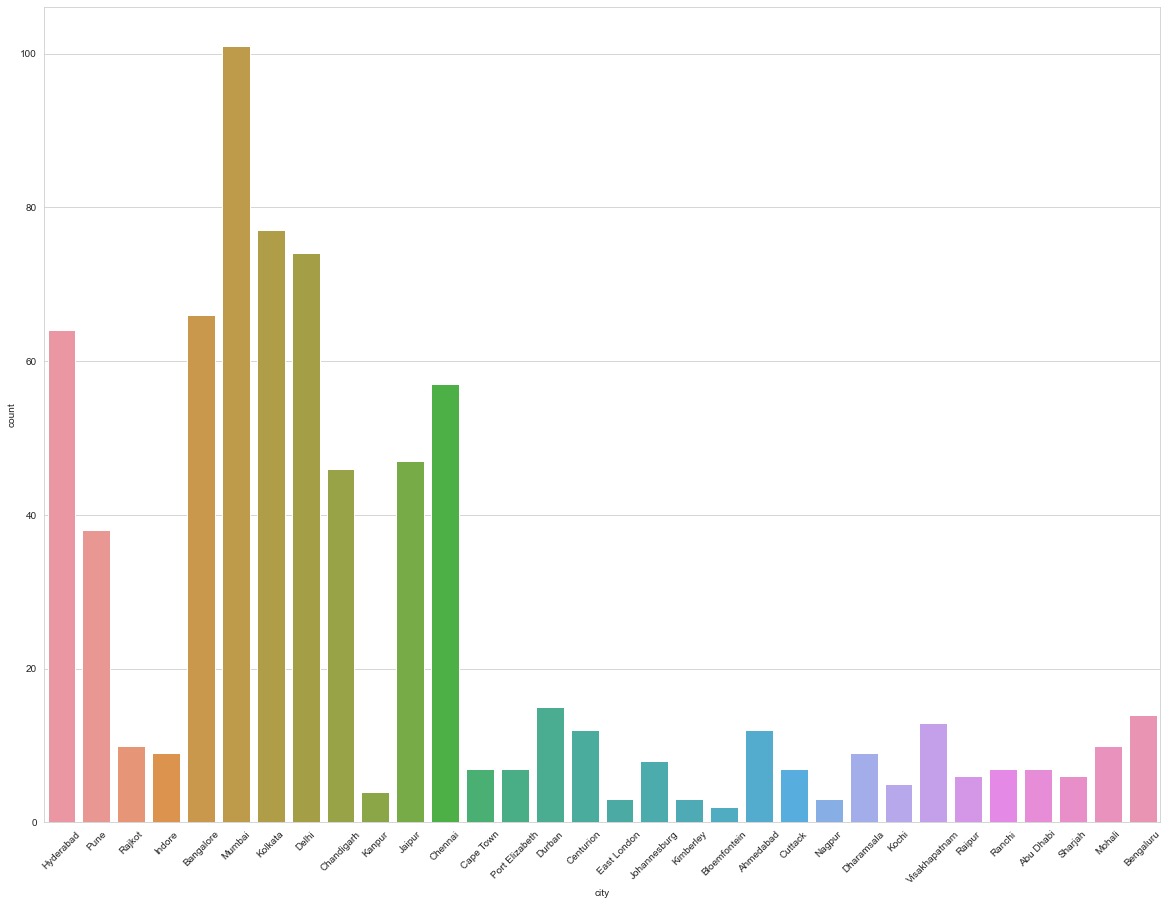

In [79]:
plt.figure(figsize=(20,15))
sns.countplot(x=matches.city)
plt.xticks(rotation=45)
plt.show()

    Most of the matches are played in India, but we can see Dubai (Abu Dhabi)  and Cape Town because due to Corona, IPL was shifted to Dubai and due to elections, IPL was shifted to South Africa.

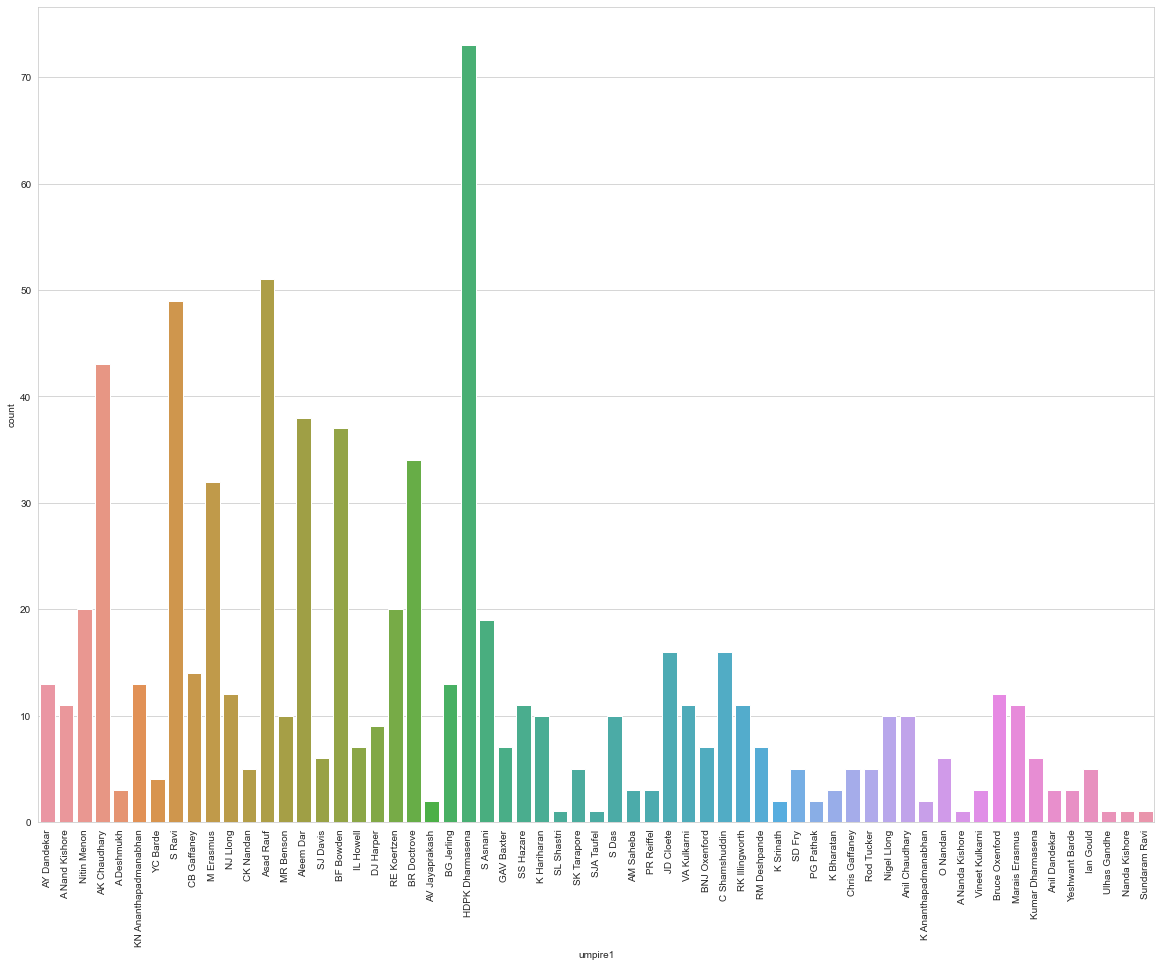

In [80]:
plt.figure(figsize=(20,15))
sns.countplot(x=matches.umpire1)
plt.xticks(rotation=90)
plt.show()

   **HDPK Dharmsena** is usually prefered for umpiring as he has umpired most of the matches compared to others.

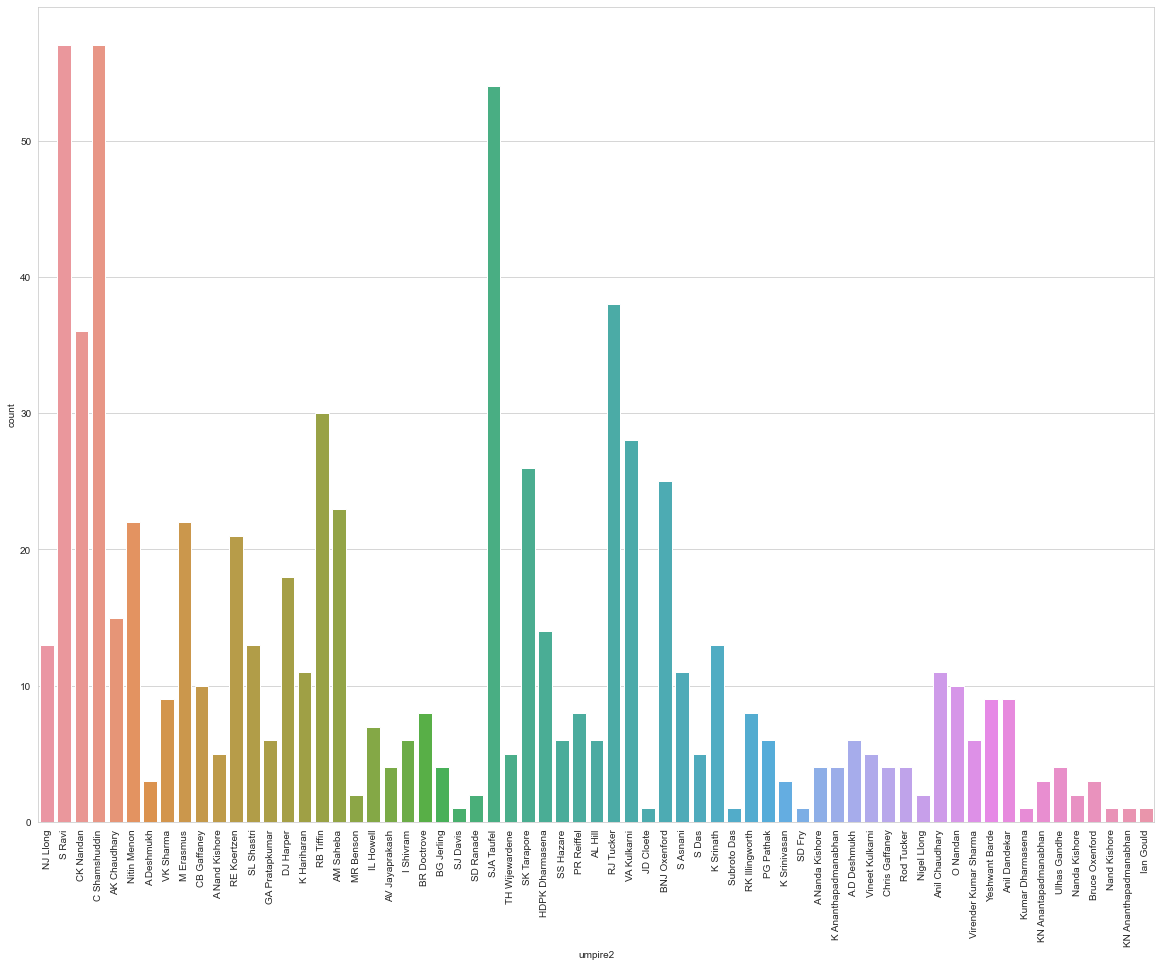

In [81]:
plt.figure(figsize=(20,15))
sns.countplot(x=matches.umpire2)
plt.xticks(rotation=90)
plt.show()

   **S Ravi** & **CK Nandan** had been Second Umpire in most of the IPL matches.

* **Thank you for watching**